In [1]:
from astropy.io import fits

In [3]:
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
plt.style.use('seaborn-white')

In [2]:
hdu = fits.open('/Volumes/Nibelheim/hst/data/HD209458/ibh726miq_flt.fits')

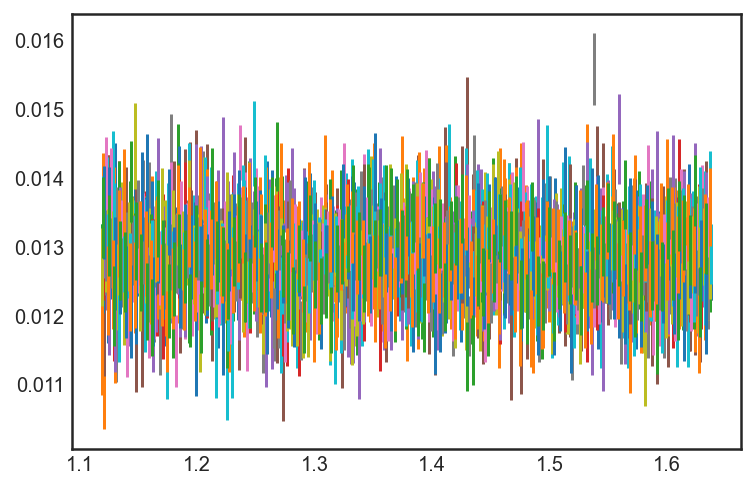

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
hdulist = fits.open('results/GJ1214_transmission.fits')
for hdu in hdulist[1:]:
    plt.errorbar(hdu.data['wavelength'], hdu.data['spectrum'] * 1e-6 + hdu.header['depth'], hdu.data['spectrum_err'] * 1e-6, ls='')

In [27]:
import ombre as om
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
plt.style.use('seaborn-white')

In [28]:
s = om.Spectra.from_file('results/GJ1214_transmission.fits')

Text(0, 0.5, 'Visit Number')

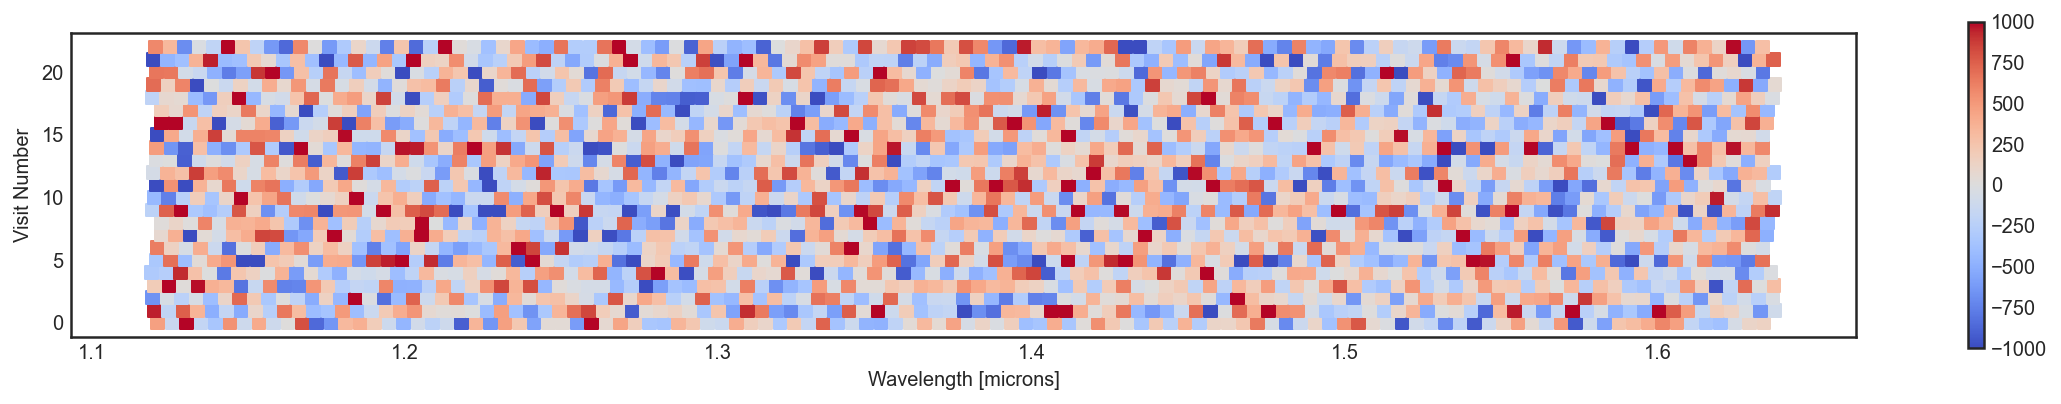

In [29]:
plt.figure(figsize=(20, 3))
[plt.scatter(s1.wavelength, np.zeros_like(s1.wavelength) + idx, c = s1.spec, marker='s', s=40, vmin=-1000, vmax=1000, cmap='coolwarm') for idx, s1 in enumerate(s)]
plt.gca().set_aspect(0.004)
plt.colorbar()
plt.xlabel('Wavelength [microns]')
plt.ylabel('Visit Number')

In [30]:
s = om.Spectra.from_file('results/GJ1214_transmission.fits').flatten()

In [31]:
bins = np.arange(0.8, 1.7, 0.0012*2)
y, ye = np.zeros(len(bins) - 1) * np.nan, np.zeros(len(bins) - 1) * np.nan
for idx in range(len(bins) - 1):
    k = (s.wavelength > bins[idx]) & (s.wavelength <= bins[idx + 1])
    if k.sum() == 0:
        continue
    y[idx] = np.average(s.spec[k], weights=1/s.spec_err[k])
#    ye[idx] = np.sum(s.spec_err[k] ** 2) ** 0.5 / k.sum()
    ye[idx] = np.average((s.spec[k] - y[idx])**2, weights=1/s.spec_err[k])**0.5/(k.sum()**0.5)
bins = bins[:-1] + np.median(np.diff(bins)) / 2

<ErrorbarContainer object of 3 artists>

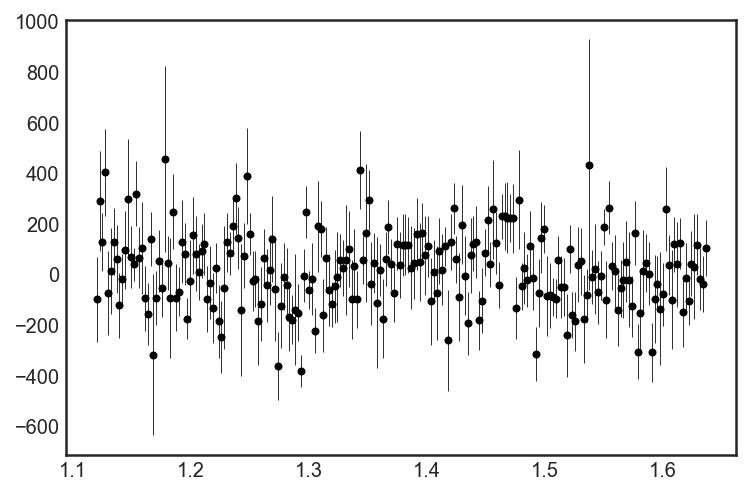

In [32]:
plt.errorbar(bins, y, ye, ls='', c='k', lw=0.4, marker='.')

In [30]:
import pandas as pd

In [42]:
df = pd.DataFrame(np.vstack([s.wavelength, s.spec*1e-4+s.depth*1e2, s.spec_err*1e-4]).T, columns=['wavelength', 'rprs2', 'rprs2_err'])

In [44]:
df.to_csv('for_natasha_unbinned_GJ1214_Nov8.csv', index=False)

<ErrorbarContainer object of 3 artists>

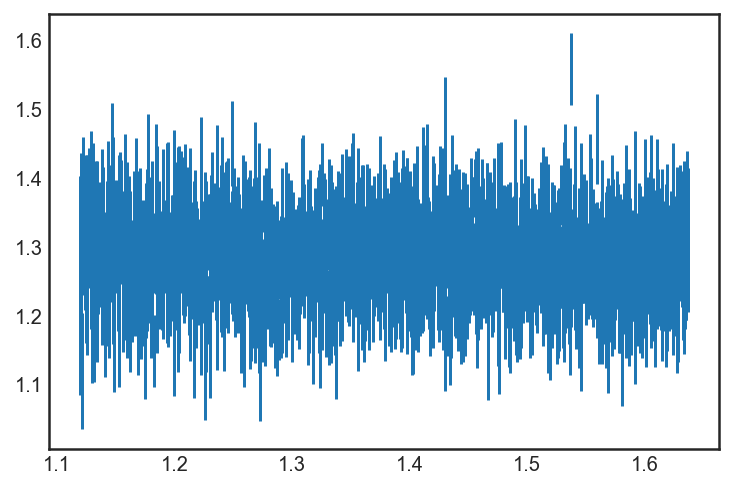

In [29]:
plt.errorbar(s.wavelength, s.spec*1e-4+s.depth*1e2, s.spec_err*1e-4, ls='')

(1.2, 1.25)

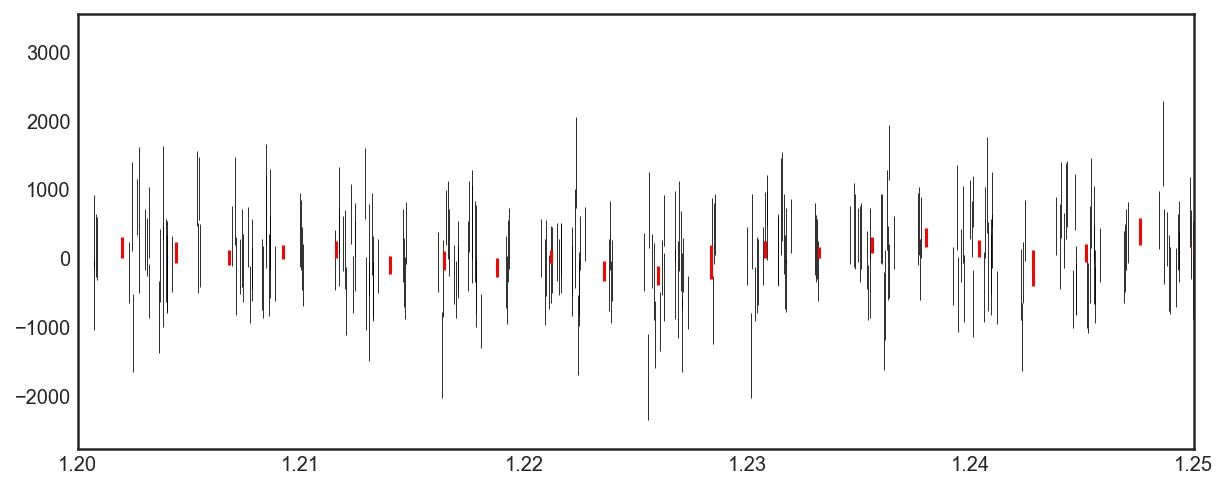

In [7]:
plt.figure(figsize=(10, 4))
plt.errorbar(s.wavelength, s.spec, s.spec_err, ls='', lw=0.4, c='k')
plt.errorbar(bins, y, ye, ls='', c='r')
plt.xlim(1.2, 1.25)

Spectrum [Visit 3]